## data processing before questions

In [1]:
%matplotlib inline
import pandas as pd
fiscal=pd.read_csv("Sdf16_1a.txt", sep='\t')

#aggregate by states


#get total non-federal fund
non_federal_fund_list=['T06', 'T09', 'T15', 'T40', 'T99','T02',
                      'D23','D11','A07','A08','A11','A09','A13',
                      'A20','A40','U11','U22','U30','U50','U97',
                      'C01','C04','C05','C06','C07','C08','C09',
                      'C10','C11','C12','C13']
fiscal['non_federal_fund']=0
for column_name in non_federal_fund_list:
    fiscal.non_federal_fund+=fiscal[column_name]

#get total expenditure
expenditure_list=['E13','E17','E07','E08','E08', 'E09',
                 'V40','V45','V90','E11','V60','V65','V70',
                 'V75','V80','F12','G15','K09','K10','Q11',
                 'L12','M12','I86']
fiscal['expen']=0
for column_name in expenditure_list:
    fiscal.expen+=fiscal[column_name]
    

#get total federal fund
list2=['C14','C15','C16','C17','C19',
                          'C25','B11','C20','B10','B12','B13']
fiscal['new_federal_fund']=0
for column_name in list2:
    fiscal.new_federal_fund+=fiscal[column_name]

fiscal['expen']=0
for column_name in expenditure_list:
    fiscal.expen+=fiscal[column_name]
#get total federal fund
state_fis=fiscal.groupby(['STNAME'])['V33','C14','C15','C16','C17','C19',
                          'C25','B11','C20','B10','B12','B13','non_federal_fund',
                                    'expen'].agg('sum')
state_fis['federal_fund']=state_fis.C14+state_fis.C15+state_fis.C16+state_fis.C17+\
state_fis.C19+state_fis.C25+state_fis.B11+state_fis.C20+state_fis.B10+\
state_fis.B12+state_fis.B13
state_fis['num_pupil']=state_fis['V33']

/Users/yzh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Question 1

## Rank and visualize the states that take in the most federal funding (revenue).

Text(0,0.5,'funding')

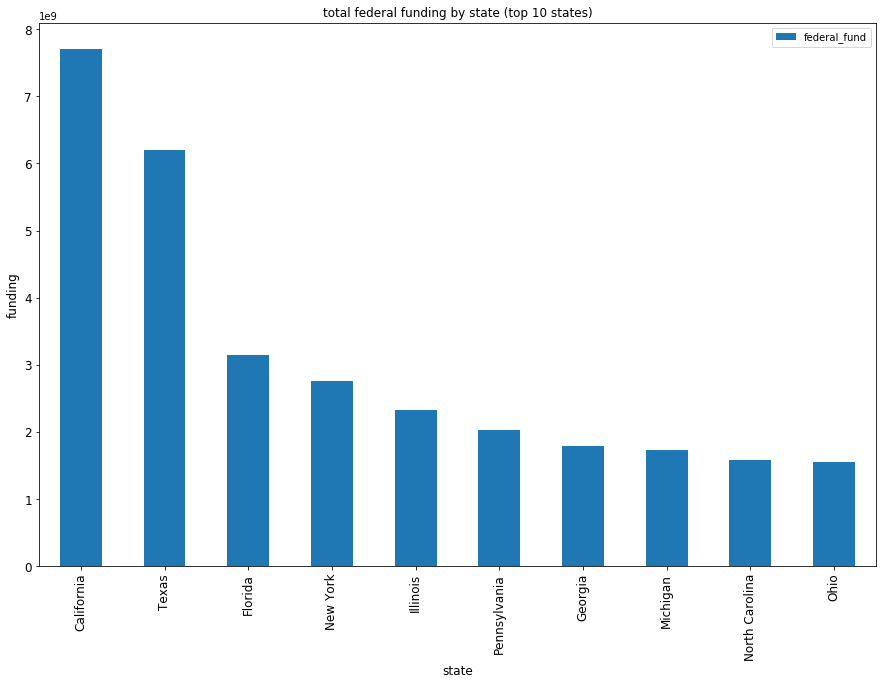

In [2]:


#rank and visualize
state_fis.sort_values("federal_fund", ascending=False, inplace=True, kind='quicksort', na_position='last')
# import matplotlib.pyplot as plt
# plt.show()
ax = state_fis[['federal_fund']].head(10).plot(kind='bar', title ="total federal funding by state (top 10 states)", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("state", fontsize=12)
ax.set_ylabel("funding", fontsize=12)

## Which states spend the most federal funding per student?  Answer: district of columbia , according to output below

In [3]:
state_fis['funding_per_capita']=state_fis['federal_fund']/state_fis['num_pupil']
state_fis.sort_values("funding_per_capita", ascending=False, inplace=True, kind='quicksort', na_position='last')
state_fis.head(1)

,V33,C14,C15,C16,C17,C19,C25,B11,C20,B10,B12,B13,non_federal_fund,expen,federal_fund,num_pupil,funding_per_capita
STNAME,,,,,,,,,,,,,,,,,
District of Columbia,83369,44418985,15600985,9436985,320985,3210985,44391985,778985,63339985,44680985,-15,20985,1943229739,2352554655,226201835,83369,2713.260744


# Question 2

## Visualize the relationship between school districts’ total revenue and expenditures.

Text(0,0.5,'total expense of a LEA')

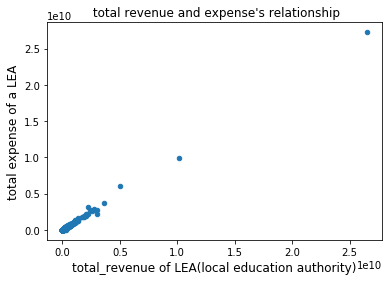

In [4]:
fiscal['total_rev']=fiscal.new_federal_fund+fiscal.non_federal_fund
ax = fiscal.plot(kind='scatter',x='total_rev',y='expen',
                    title=" total revenue and expense's relationship")
ax.set_xlabel("total_revenue of LEA(local education authority)", fontsize=12)
ax.set_ylabel("total expense of a LEA", fontsize=12)

Text(0,0.5,'total expense of a state')

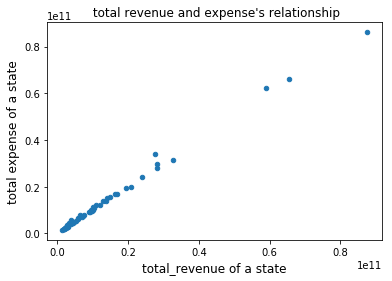

In [5]:
state_fis_no_index=state_fis.reset_index()
state_fis['total_rev']=state_fis.federal_fund+state_fis.non_federal_fund
ax = state_fis.plot(kind='scatter',x='total_rev',y='expen',
                    title=" total revenue and expense's relationship")
ax.set_xlabel("total_revenue of a state", fontsize=12)
ax.set_ylabel("total expense of a state", fontsize=12)

## Which states have the most debt per student?
## answser: alaska, according to output below

In [6]:
state_fis['debt_per_capita']=(state_fis.expen-state_fis['total_rev'])/\
                              state_fis['num_pupil']
state_fis.sort_values("debt_per_capita", ascending=False, inplace=True, kind='quicksort', na_position='last')
state_fis.head(1)

,V33,C14,C15,C16,C17,C19,C25,B11,C20,B10,B12,B13,non_federal_fund,expen,federal_fund,num_pupil,funding_per_capita,total_rev,debt_per_capita
STNAME,,,,,,,,,,,,,,,,,,,
Arkansas,492084,160911973,132132973,21266973,-27,7044973,189581973,3054973,59749973,-27,154973,33046973,3396600208,5663706379,606945703,492084,1233.418894,4003545911,3373.733891


# Question 3

In [7]:
perform=pd.read_csv('/Users/yzh/Downloads/math-achievement-lea-sy2015-16.csv')

/Users/yzh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## use ALL_MTH00PCTPROF_1516: percentage of  students over the proficiency.
## my function, for instance, converts 20%-25% to 22.5%
## Also it converts other value like PS which is na value, into np.nan
## plot is shown below

Text(0,0.5,'number of LEAs( local education authority)')

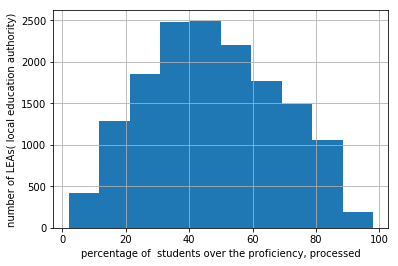

In [8]:
import numpy as np
def starts_with_num(mystr):
    nums=['0','1','2','3','4','5','6','7','8','9']
    myset=set(nums)
    if mystr[0] in myset:
        return True
    return False


def convert(series):
  res=[]
  for score in list(series): 
    if starts_with_num(score): #if starts with a number( must be string )
        index=score.find('-') #first occurence of '-'
        if index<0: #an exact number
            res.append( int(score) )
        else: #get middle value of the range
            res.append( ( int(score[0:index])+int(score[index+1:]) )/2 )
    else:  #get rid of PS values etc. PS is just NA value
        res.append(np.nan)
  return res

ax=pd.Series( convert(perform.ALL_MTH00PCTPROF_1516) ).hist()
ax.set_xlabel('percentage of  students over the proficiency, processed')
ax.set_ylabel('number of LEAs( local education authority)')

## problem 4

In [9]:
perform['lea_score']=convert(perform.ALL_MTH00PCTPROF_1516)
perform['LEAID']=perform['LEAID'].astype('object')
fiscal=pd.merge(fiscal, perform[['LEAID', 'lea_score']], how='left', on=['LEAID'])

## 8124824777.7 dollar will be cut 

In [10]:
total_cut=sum(fiscal.new_federal_fund)*0.15
print('cut money:', total_cut)

cut money: 8124890627.7


## a good portion of shcools have non_federal_funds( funds except federal) more than the expense.

Text(0,0.5,'number of LEAs( local education authority)')

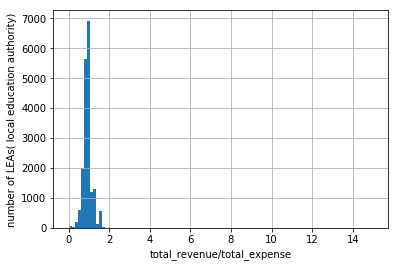

In [11]:
fiscal['ratio']=( fiscal.non_federal_fund )/ (fiscal.expen)
fiscal=fiscal[fiscal.ratio!=float('Inf')]
fiscal=fiscal[fiscal.ratio!=-float('Inf')]

ax=fiscal['ratio'].hist(bins=100)
ax.set_xlabel('total_revenue/total_expense')
ax.set_ylabel('number of LEAs( local education authority)')

## so we can cut the federal funds from LEAs with almost enough non_federal_fund (covers 90% of expense)

## federal fund from the LEAs with non_federal_fund covering more than 90% expense > all the fund tha need to cut 

In [12]:
funds=fiscal[fiscal.expen>0]
funds=funds[funds.non_federal_fund>0]
funds=funds[( funds.non_federal_fund )/ (funds.expen)>0.9]
funds=funds[funds.lea_score>=0]

print(funds['new_federal_fund'].sum(), total_cut)
funds['new_federal_fund'].sum()>=total_cut

9867129000 8124890627.7


True

## after selecting LEA with enough non-federal funds, then we sort by LEA academic score to cut high-score school's funds, and we cut schools until we have enough funds

In [13]:
funds.sort_values("lea_score", ascending=False, inplace=True,
                      na_position='last')
scores=list(funds['lea_score'])
fed_funds=list(funds['new_federal_fund'])
i=0
sum_cut=0
funds_cut=[]
while sum_cut<total_cut:
    funds_cut.append(fed_funds[i])
    sum_cut+=fed_funds[i]
    i+=1;

output=pd.DataFrame()
output['LEAID']=funds.head(len(funds_cut))['LEAID']
output['fund_cut']=funds_cut

## here is the fund_cut plan output

In [14]:
output

,LEAID,fund_cut
16153,4813020,3545000
6490,2503870,701000
15854,4800118,2977000
16280,4817760,2116000
15996,4801438,338000
6460,2502710,792000
6413,2500539,286000
16377,4821540,391000
16334,4819950,1364000
6569,2506930,662000


# problem 5: justify:

##  A good portion of shcools have non_federal_funds( funds except federal) more than the expense. So we can cut the federal funds from LEAs with almost enough non_federal_fund

## defintion of LEAs with almost enough non_federal_fund: with non_federal_fund covering more than 90% expense

## federal fund from the LEAs with non_federal_fund covering more than 90% expense > all the fund tha need to cut

## After selecting LEA with enough non-federal funds,  we sort by LEA academic score to cut high-score school's funds, and we cut funds by this order until we have enough funds. This is because schools with high academic-scores tend to be wealthy, and poor people and schools with low academic-scores typically need more funding.